# Hops

What kind of hops are commonly used in certain beer styles? And how many do they use?

In [1]:
import json
import pandas

json_data = json.load(open("../data/recipes.json"))
hops = pandas.json_normalize(json_data, "hops", ["style", "uid"], record_prefix="hop_")

Pick styles to analyze:

In [2]:
# Pick a style
styles = ["pale ale"]

# Hops are aggregated for each recipe
style_hops = hops[hops["style"].isin(styles)].groupby(["uid", "hop_kind"]).agg({"hop_amount": "sum", "hop_amount_percent": "sum"}).reset_index()
style_hops["hop_kind"].value_counts()[:10]

hop_ratio = style_hops.groupby("hop_kind")['hop_amount_percent'].agg(['min', 'max', 'mean', 'count'])
hop_ratio = hop_ratio[hop_ratio['count'] > 3] # Filter low amount of data points
hop_ratio.sort_values(by='count', ascending=0).head(20)

,min,max,mean,count
hop_kind,,,,
cascade,4.816514,100.000000,56.579787,81
citra,4.816514,100.000000,60.556312,49
magnum,6.557377,100.000000,27.284281,36
amarillo,20.000000,100.000000,44.472699,33
simcoe,11.111111,100.000000,47.477678,31
perle,7.142857,100.000000,41.402142,23
chinook,9.090909,100.000000,46.129876,16
mandarina bavaria,20.202020,100.000000,58.313395,15
hüll melon,25.000000,100.000000,61.869781,12


In [3]:
top_hops = style_hops["hop_kind"].value_counts()[:20].index.values
style_top_hops = style_hops[style_hops['hop_kind'].isin(top_hops)] # Get only the values of the mostly used hops
# style_top_hops.loc[:, ["hop_kind", "hop_amount_percent"]]

<AxesSubplot:xlabel='hop_kind', ylabel='hop_amount_percent'>

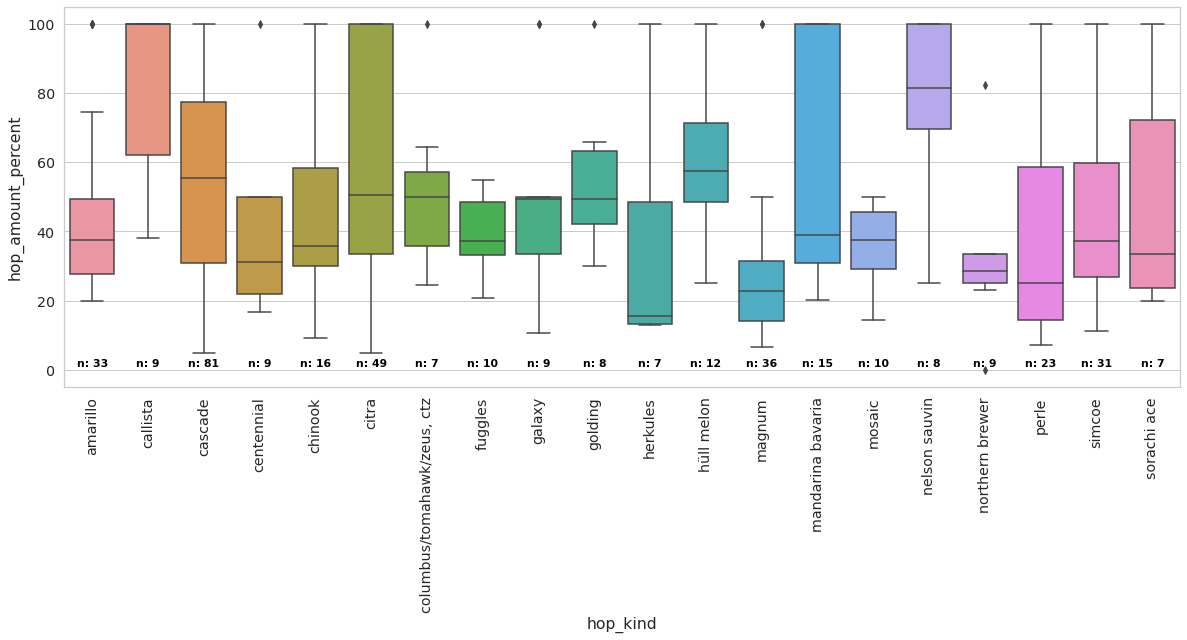

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))
sns.set(style="whitegrid", font_scale=1.3)

style_top_hops = style_top_hops.sort_values(["hop_kind"]).reset_index(drop=True)

# Calculate number of obs per group
nobs = style_top_hops.groupby("hop_kind")["hop_kind"].agg(["count"]).sort_values(["hop_kind"]).reset_index(drop=True)['count'].values
nobs = [str(x) for x in nobs]
nobs = ["n: " + i for i in nobs]

plot = sns.boxplot(x=style_top_hops["hop_kind"], y=style_top_hops["hop_amount_percent"])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

pos = range(len(nobs))
for tick, label in zip(pos, plot.get_xticklabels()):
    plot.text(pos[tick], 1, nobs[tick],
        horizontalalignment='center', size='x-small', color='black', weight='semibold')

plot